## Импорт библиотек

In [4]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from scipy.stats import mannwhitneyu,ttest_ind, kruskal,chisquare, pearsonr, spearmanr
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

In [14]:
df = pd.read_csv('/content/covid_data.csv')
df = df.drop('Unnamed: 0', axis=1)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 863 entries, 0 to 862
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Min_Platlets      863 non-null    float64
 1   Max_ESR           863 non-null    float64
 2   Max_Fibrinogen    863 non-null    float64
 3   Max_LDH           863 non-null    float64
 4   Max_Leucocytes    863 non-null    float64
 5   Gender            863 non-null    int64  
 6   Max_CRP           863 non-null    float64
 7   Severity          863 non-null    int64  
 8   IHD               863 non-null    int64  
 9   COPD              863 non-null    int64  
 10  Bronchial_asthma  863 non-null    int64  
 11  Obesity           863 non-null    int64  
 12  Diabetes          863 non-null    int64  
 13  ALT               863 non-null    float64
 14  AST               863 non-null    float64
 15  duration          863 non-null    int64  
 16  Age               863 non-null    int64  
 1

Данные чистые, пропущенных значений нет

In [16]:
df.describe()

,Min_Platlets,Max_ESR,Max_Fibrinogen,Max_LDH,Max_Leucocytes,Gender,Max_CRP,Severity,IHD,COPD,Bronchial_asthma,Obesity,Diabetes,ALT,AST,duration,Age,Max_Creatinine,RF_0.0,RF_1.0,RF_2.0,RF_3.0,GFR,Ab_ind,L/Pl_Ratio
count,863.000000,863.000000,863.000000,863.000000,863.000000,863.000000,863.000000,863.000000,863.000000,863.000000,863.000000,863.000000,863.000000,863.000000,863.000000,863.000000,863.000000,863.000000,863.000000,863.000000,863.000000,863.000000,863.000000,863.000000,863.000000
mean,192.176246,39.944380,7.223754,741.267671,13.035805,0.533024,132.850058,0.466976,0.453071,0.050985,0.009270,0.006952,0.012746,86.703650,55.577752,20.151796,62.231750,1.063453,0.024334,0.183082,0.405562,0.012746,84.440324,0.171495,30.083546
std,77.569996,15.094034,1.853217,315.506819,4.905015,0.499198,74.470604,0.499198,0.498081,0.220095,0.095889,0.083139,0.112242,53.409565,28.930871,6.565847,12.810218,0.708667,0.154172,0.386958,0.491285,0.112242,12.314455,0.377159,38.229929
min,28.300000,2.000000,2.100000,134.800000,0.500000,0.000000,30.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.040000,30.040000,5.000000,32.000000,0.190000,0.000000,0.000000,0.000000,0.000000,38.000000,0.000000,1.400000
25%,138.950000,30.000000,6.100000,507.950000,10.000000,0.000000,60.150000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,55.535000,39.340000,15.000000,53.000000,0.810000,0.000000,0.000000,0.000000,0.000000,77.000000,0.000000,17.150000
50%,185.400000,41.000000,7.600000,711.600000,12.700000,1.000000,124.400000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,72.230000,47.420000,20.000000,61.000000,0.920000,0.000000,0.000000,0.000000,0.000000,85.000000,0.000000,23.500000
75%,235.300000,52.000000,8.700000,934.150000,15.700000,1.000000,197.800000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,96.350000,60.095000,25.000000,72.000000,1.050000,0.000000,0.000000,1.000000,0.000000,93.000000,0.000000,31.950000
max,578.700000,77.000000,10.000000,1937.600000,39.200000,1.000000,292.600000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,344.870000,283.420000,31.000000,89.000000,7.370000,1.000000,1.000000,1.000000,1.000000,153.000000,1.000000,458.800000


# **<span style="color:#6daa9f;">Анализ данных</span>**

Визуализация данных


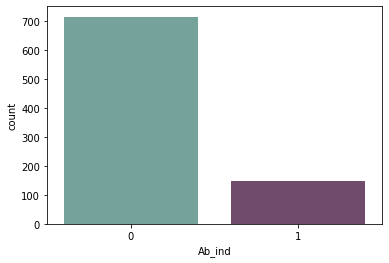

In [17]:
#Посмотрим на баланс данных 
cols= ["#6daa9f","#774571"]
sns.countplot(x= df["Ab_ind"], palette= cols)

In [19]:
neg, pos = np.bincount(df['Ab_ind'])
total = neg + pos
print('Examples:\n    Total: {}\n    Positive: {} ({:.1f}% of total)\n'.format(
    total, pos, 100 * pos / total))

Examples:
    Total: 863
    Positive: 148 (17.1% of total)



Отметим, что данные несбалансированы

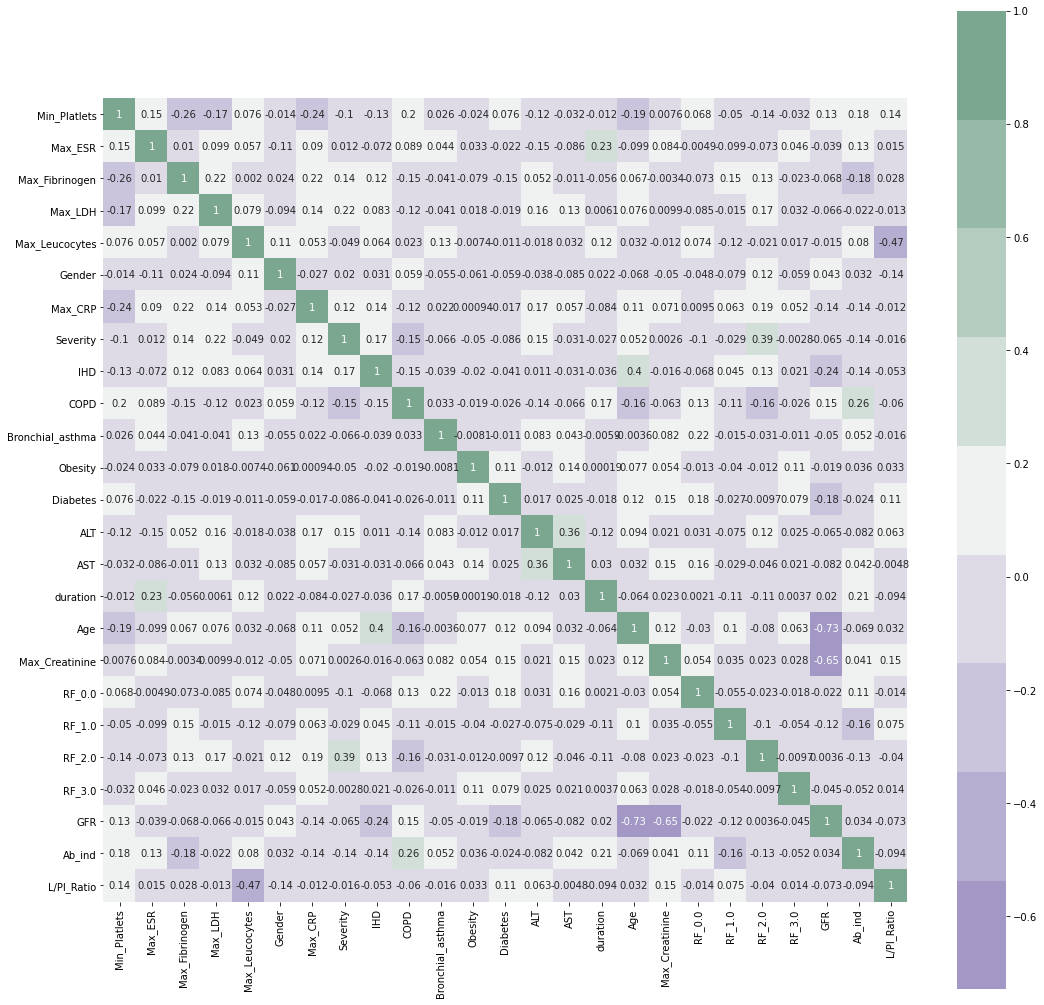

In [20]:
#Построим корреляционную матрицу
cmap = sns.diverging_palette(275,150,  s=40, l=65, n=9)
corrmat = df.corr()
plt.subplots(figsize=(18, 18))
sns.heatmap(corrmat, cmap= cmap, annot=True, square=True);

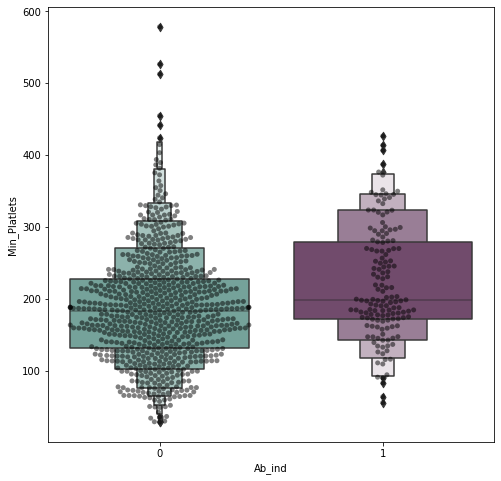

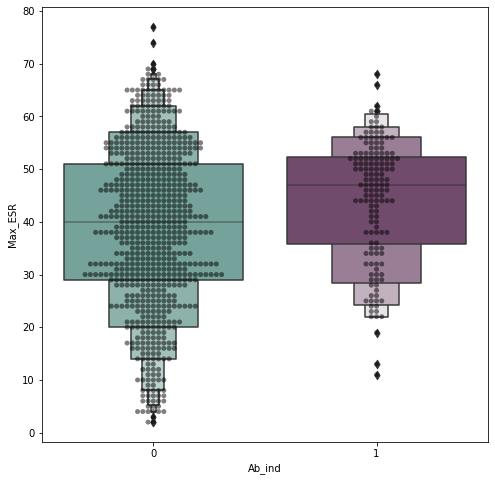

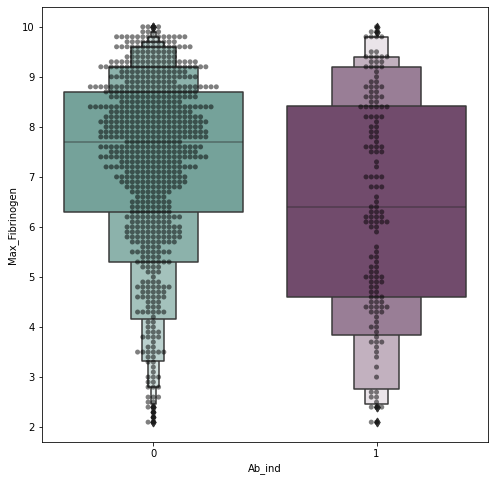

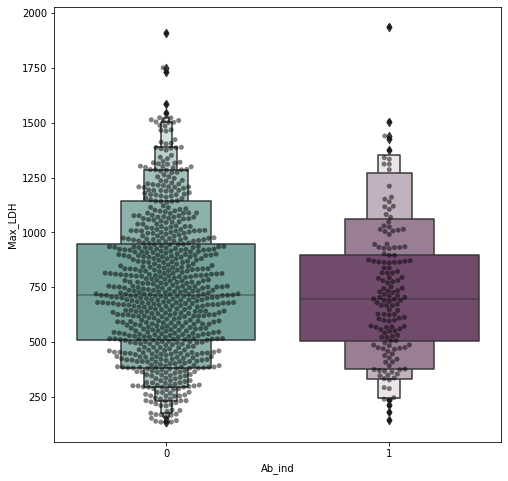

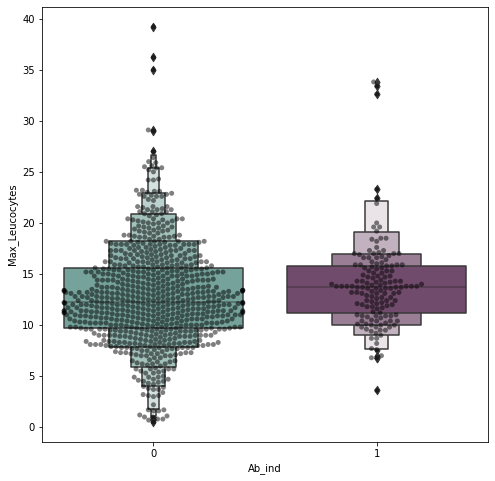

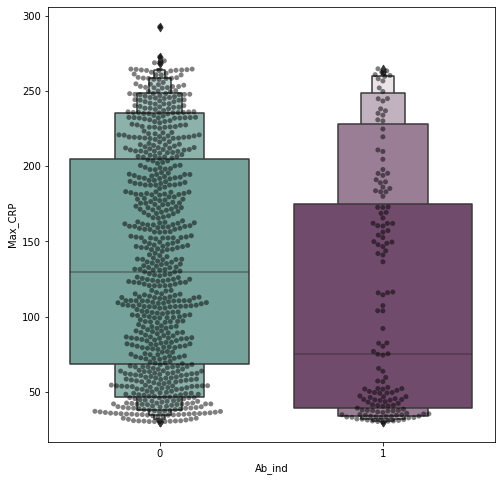

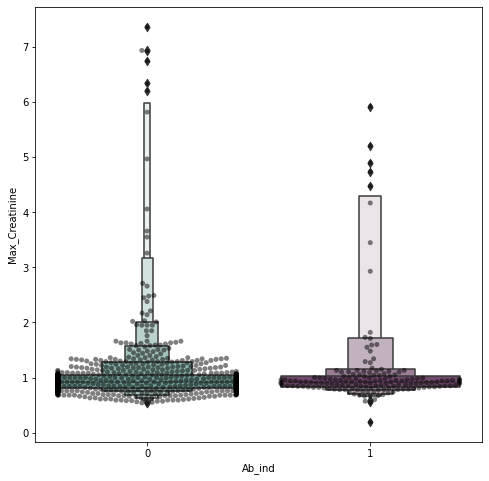

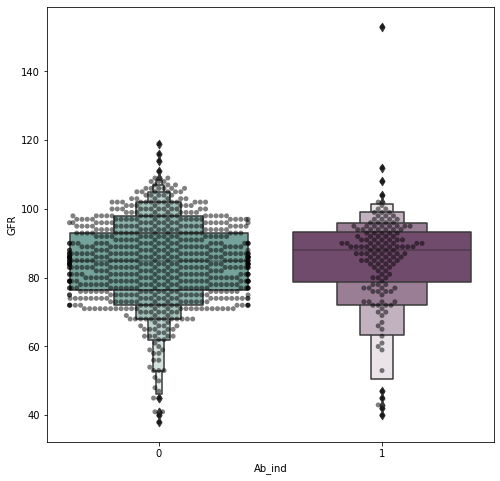

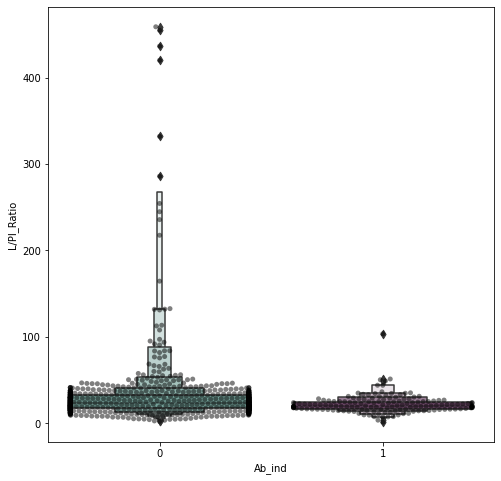

In [21]:
# построим ящичковые диагнаммы с рассеянием
feature = ['Min_Platlets', 'Max_ESR', 'Max_Fibrinogen', 'Max_LDH',
       'Max_Leucocytes',  'Max_CRP','Max_Creatinine','GFR','L/Pl_Ratio']
for i in feature:
    plt.figure(figsize=(8,8))
    sns.swarmplot(x=df["Ab_ind"], y=df[i], color="black", alpha=0.5)
    sns.boxenplot(x=df["Ab_ind"], y=df[i], palette=cols)
    plt.show()

In [ ]:
sns.kdeplot(x=df['Max_ESR'], y=df["Age"], hue=df["Ab_ind"], palette=cols)

Итак, какие выводы:

1) В основном данные распределены ненормально
2) Визуально есть различия между группами с показаниями и без показаний к назначению антибиотиков
3) Дальнейший стат.анализ поможет сказать более уверенно
4) Есть визуальное ощущение, что СОЭ влияет больше всего на показание к АБ, по-сути, это не удивительно, т.к. этот показатель отражает диспротеинемию, характерную для бактериальной инфекции

In [25]:
columns =['Min_Platlets', 'Max_ESR', 'Max_Fibrinogen', 'Max_LDH',
       'Max_Leucocytes',  'Max_CRP','Max_Creatinine','GFR','L/Pl_Ratio']
df_no_ind = df[df['Ab_ind'] == 0]
df_ind = df[df['Ab_ind'] == 1]



---
## Классические статистические тесты


## Проверим подвыборка на нормальность распределения.
Нулевая гипотеза в этом случае: данные распределены нормально. p-value в данном случае, показывает вероятность ошибиться в случает, если мы отвергнем нулевую гипотезу.

In [26]:
for i in columns:
  lst1 = df_no_ind[i]
  lst2 = df_ind[i]
  shapiro_test = stats.shapiro(lst1) # тест шапиро-уилка
  shapiro_test2 = stats.shapiro(lst2) # тест шапиро-уилка
  if shapiro_test[1] < .05:
    print('Данные {0} распределены ненормально,\
           p-value - {1}'.format(i,  shapiro_test[1]))
  if shapiro_test2[1] < .05:
    print('Данные {0} распределены ненормально,\
           p-value - {1}'.format(i,  shapiro_test2[1]))
  else:
    pass

Данные Min_Platlets распределены ненормально,           p-value - 2.2496317308995373e-11
Данные Min_Platlets распределены ненормально,           p-value - 0.0046564731746912
Данные Max_ESR распределены ненормально,           p-value - 1.6432072698080447e-06
Данные Max_ESR распределены ненормально,           p-value - 2.1818234017700888e-05
Данные Max_Fibrinogen распределены ненормально,           p-value - 8.701200213717984e-17
Данные Max_Fibrinogen распределены ненормально,           p-value - 4.6909113734727725e-05
Данные Max_LDH распределены ненормально,           p-value - 1.7956045894607087e-07
Данные Max_LDH распределены ненормально,           p-value - 0.0016341493465006351
Данные Max_Leucocytes распределены ненормально,           p-value - 1.087012632683404e-10
Данные Max_Leucocytes распределены ненормально,           p-value - 1.7819214159775498e-10
Данные Max_CRP распределены ненормально,           p-value - 5.4264262484617843e-17
Данные Max_CRP распределены ненормально,     

p-value ниже 0.05, т.о мы отвергаем нулевую гипотезу о нормальности распределения и будем работать с данными используя непараметрические стат.методы

In [ ]:
def Basic_statistics(lst_1, lst_2):
    """ 
    Функция "Базовые статистики"

    На вход получает 2 списка данных для сравнения.
    На выходе получаем p-values, при сравнении признаков. 
    В частности: показаны, не показаны антибиотики
    """
    res_mw = mannwhitneyu(lst_1, lst_2, 
                       use_continuity=True, 
                       alternative=None) # u -тест манна-уитни
    res_kw = kruskal(lst_1, lst_2)## краскела уолиса
    anova = stats.f_oneway(lst_1, lst_2) #тест анова
    return res_mw[1], res_kw[1],  anova[1]
for col in columns:
  lst1 = df_no_ind[col]
  lst2 = df_ind[col]
  mw =  Basic_statistics(lst1, lst2)[0]
  kw =  Basic_statistics(lst1, lst2)[1]
  an =  Basic_statistics(lst1, lst2)[2]
  if mw < .05:
    print('Данные {0} статисически значимо различаются в подгруппах,\
           p-value - {1}, тест Манна-Уитни'.format(col,  mw))
  if kw < .05:
    print('Данные {0} статисически значимо различаются в подгруппах,\
           p-value - {1}, тест Крускала-Уоллиса'.format(col,  kw))
  if an < .05:
    print('Данные {0} статисически значимо различаются в подгруппах,\
           p-value - {1}, тест Анова'.format(col,  an))
  else:
    pass


Данные Min_Platlets статисически значимо различаются в подгруппах,           p-value - 3.2855745293407934e-07, тест Манна-Уитни
Данные Min_Platlets статисически значимо различаются в подгруппах,           p-value - 6.565008618092226e-07, тест Крускала-Уоллиса
Данные Min_Platlets статисически значимо различаются в подгруппах,           p-value - 2.2212869639839813e-07, тест Анова
Данные Max_ESR статисически значимо различаются в подгруппах,           p-value - 6.572563797722308e-05, тест Манна-Уитни
Данные Max_ESR статисически значимо различаются в подгруппах,           p-value - 0.00013135466386457627, тест Крускала-Уоллиса
Данные Max_ESR статисически значимо различаются в подгруппах,           p-value - 0.00011784582665018135, тест Анова
Данные Max_Fibrinogen статисически значимо различаются в подгруппах,           p-value - 9.701834609290562e-06, тест Манна-Уитни
Данные Max_Fibrinogen статисически значимо различаются в подгруппах,           p-value - 1.9387907471511455e-05, тест Крус

#Выводы:


1.   В подгруппах есть статистически значимые различия
2.   Имеет основания гипотеза, что есть некая закономерность в анализах у пациентов с показаниями к антибиотикотерапии

